In [1]:
import torch
import torchaudio
import torchaudio.transforms as T
from torch.utils.data import Dataset, DataLoader
import torchvision.models as models
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython.display import Audio, display
import pandas as pd
import os
import numpy as np
from tqdm import trange
import librosa
from utils import *

In [10]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
metadata = torchaudio.info('wavfiles/0c67f402.wav')
print_metadata(metadata)

 - sample_rate: 44100
 - num_channels: 1
 - num_frames: 441000
 - bits_per_sample: 16
 - encoding: PCM_S



In [3]:
df = pd.read_csv('instruments.csv')
df.head()

,fname,label
0,5388d14d.wav,Saxophone
1,c685f05f.wav,Saxophone
2,36d20ab5.wav,Saxophone
3,d6665734.wav,Saxophone
4,7352e28f.wav,Saxophone


Acoustic_guitar


<Figure size 432x288 with 0 Axes>

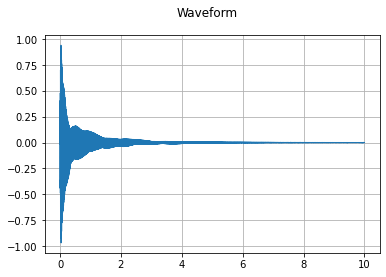

/home/ademattos/.local/lib/python3.8/site-packages/torchaudio/functional/functional.py:357: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


torch.Size([1, 128, 1103])
Bass_drum


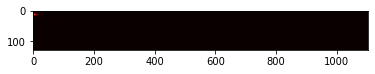

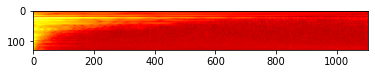

<Figure size 432x288 with 0 Axes>

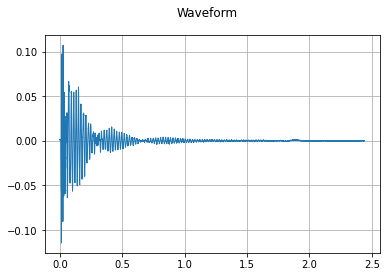

/home/ademattos/.local/lib/python3.8/site-packages/torchaudio/functional/functional.py:357: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


torch.Size([1, 128, 270])
Cello


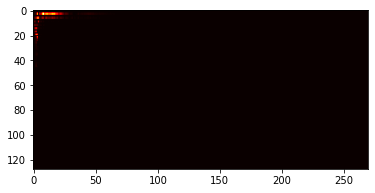

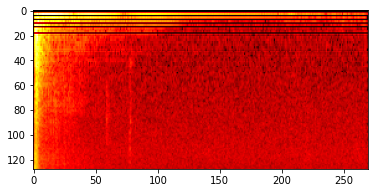

<Figure size 432x288 with 0 Axes>

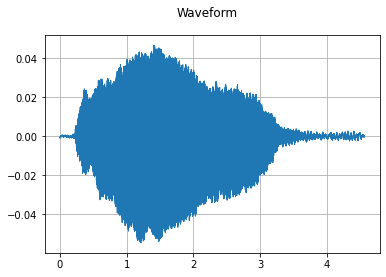

/home/ademattos/.local/lib/python3.8/site-packages/torchaudio/functional/functional.py:357: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


torch.Size([1, 128, 503])
Clarinet


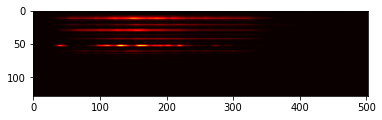

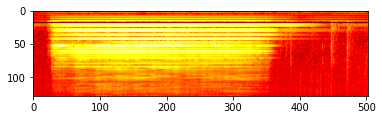

<Figure size 432x288 with 0 Axes>

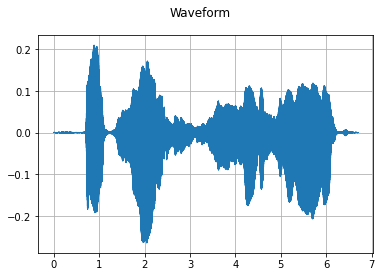

/home/ademattos/.local/lib/python3.8/site-packages/torchaudio/functional/functional.py:357: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


torch.Size([1, 128, 739])
Double_bass


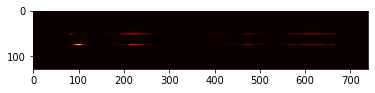

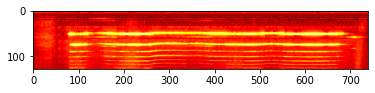

<Figure size 432x288 with 0 Axes>

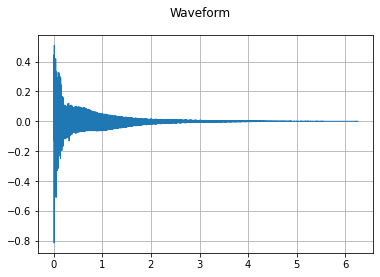

/home/ademattos/.local/lib/python3.8/site-packages/torchaudio/functional/functional.py:357: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


torch.Size([1, 128, 691])
Flute


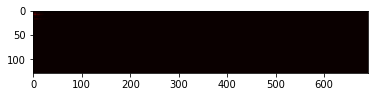

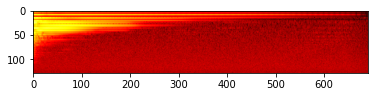

<Figure size 432x288 with 0 Axes>

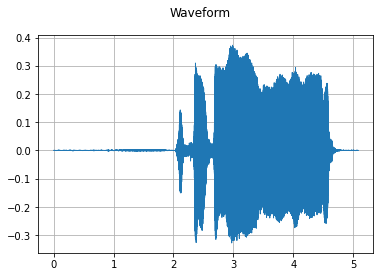

/home/ademattos/.local/lib/python3.8/site-packages/torchaudio/functional/functional.py:357: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


torch.Size([1, 128, 561])
Hi-hat


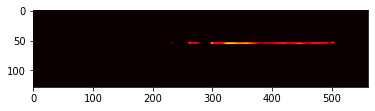

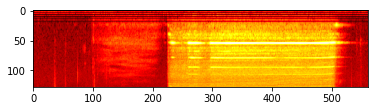

<Figure size 432x288 with 0 Axes>

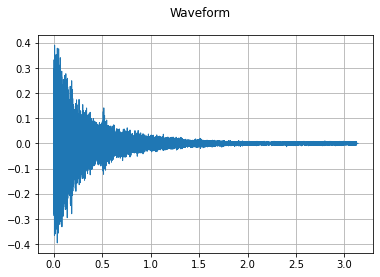

/home/ademattos/.local/lib/python3.8/site-packages/torchaudio/functional/functional.py:357: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


torch.Size([1, 128, 347])
Saxophone


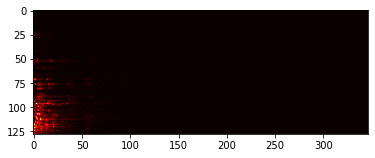

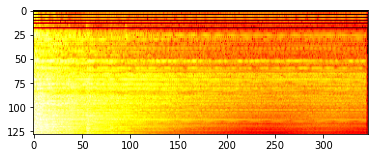

<Figure size 432x288 with 0 Axes>

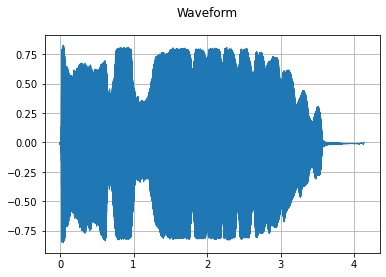

/home/ademattos/.local/lib/python3.8/site-packages/torchaudio/functional/functional.py:357: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


torch.Size([1, 128, 457])
Snare_drum


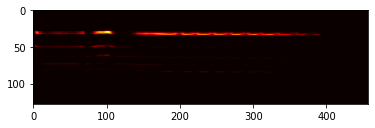

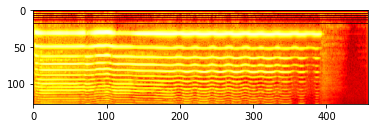

<Figure size 432x288 with 0 Axes>

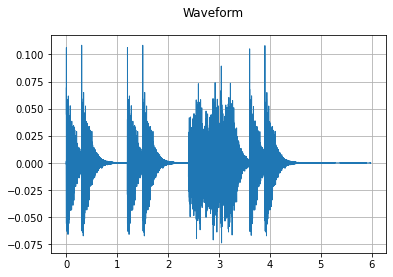

/home/ademattos/.local/lib/python3.8/site-packages/torchaudio/functional/functional.py:357: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


torch.Size([1, 128, 660])
Violin_or_fiddle


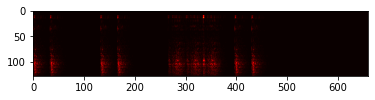

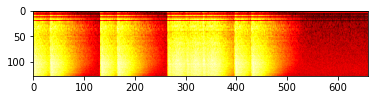

<Figure size 432x288 with 0 Axes>

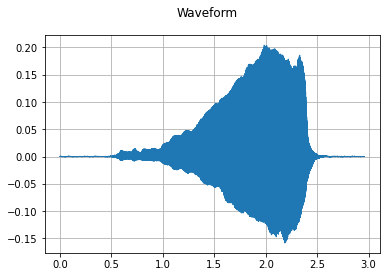

torch.Size([1, 128, 327])


/home/ademattos/.local/lib/python3.8/site-packages/torchaudio/functional/functional.py:357: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


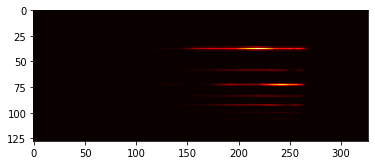

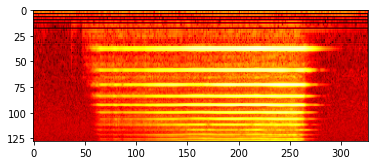

In [4]:
classes = list(np.unique(df.label))
wavforms = []
fixed_sample_rate = 22050

for c in classes:
    wav_file = df[df.label == c].iloc[0,0]
    waveform, sample_rate = torchaudio.load('wavfiles/'+wav_file, normalize=True)
    resample_transform = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=fixed_sample_rate)
    audio_mono = torch.mean(resample_transform(waveform), dim=0, keepdim=True)
    wavforms.append(audio_mono)
    print(c)
    plt.figure()
#     print_stats(waveform, sample_rate=sample_rate)
    plot_waveform(audio_mono, fixed_sample_rate)
    mel_spectogram_transform = torchaudio.transforms.MelSpectrogram(sample_rate=fixed_sample_rate, n_mels=128)
    melspectogram_db_transform = torchaudio.transforms.AmplitudeToDB()
    
    melspectogram = mel_spectogram_transform(audio_mono)
    plt.figure()
    plt.imshow(melspectogram.squeeze().numpy(), cmap='hot')

    melspectogram_db=melspectogram_db_transform(melspectogram)
    plt.figure()
    plt.imshow(melspectogram_db.squeeze().numpy(), cmap='hot')
    
    print(melspectogram_db.shape)
    
    
    
#     plot_specgram(waveform, sample_rate)
#     play_audio(waveform, sample_rate)

/home/ademattos/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


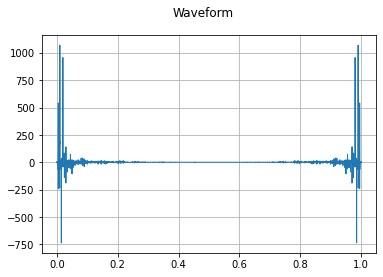

torch.Size([1, 44100])

In [5]:
fft = torch.fft.fft(wavforms[0], n=44100)
plot_waveform(fft, sample_rate)
fft.shape

NameError: name 'librosa' is not defined

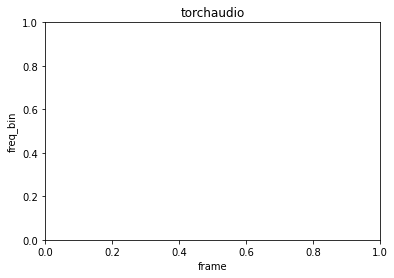

In [6]:
n_fft = 1024
win_length = None
hop_length = 512

# define transformation
spectrogram = T.Spectrogram(
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
)
# Perform transformatio4
spec = spectrogram(wavforms[0])

plot_spectrogram(spec[0], title='torchaudio')

/home/ademattos/.local/lib/python3.8/site-packages/torchaudio/functional/functional.py:357: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (256) may be set too high. Or, the value for `n_freqs` (1025) may be set too low.
  warnings.warn(


NameError: name 'librosa' is not defined

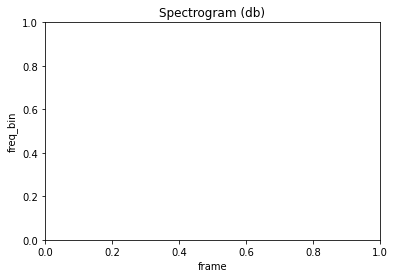

In [7]:
# waveform, sample_rate = get_speech_sample()

n_fft = 2048
win_length = None
hop_length = 512
n_mels = 256
n_mfcc = 256

mfcc_transform = T.MFCC(
    sample_rate=sample_rate,
    n_mfcc=n_mfcc, melkwargs={'n_fft': n_fft, 'n_mels': n_mels, 'hop_length': hop_length})

mfcc = mfcc_transform(wavforms[4])

plot_spectrogram(mfcc[0])
mfcc.shape

In [42]:
one_hot = pd.get_dummies(df['label'])
classes = ['Acoustic_guitar', 'Bass_drum', 'Cello', 'Clarinet', 'Double_bass', 'Fluter', 'Hi-Hat', 'Saxophone', 
          'Snare_drum', 'Violin_or_fiddle']

In [14]:
fixed_sample_rate = 22050 #22050
class AudioDataset(Dataset):
    def __init__(self, files_dir, csv_path, transform=None):
        self.transform = transform 
        self.df = pd.read_csv(csv_path)
        self.audio_files = self.df['fname']
        self.labels = np.array(pd.get_dummies(self.df['label']))
        self.files_dir = files_dir
    
    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        audio_file_loc = os.path.join(self.files_dir,self.audio_files[index])
        waveform, sr = torchaudio.load(audio_file_loc, normalize=True)
        
        resample_transform = torchaudio.transforms.Resample(orig_freq=sr, new_freq=fixed_sample_rate)
        audio_mono = torch.mean(resample_transform(waveform), dim=0, keepdim=True).to(device)
        
        mel_spectogram_transform = torchaudio.transforms.MelSpectrogram(sample_rate=fixed_sample_rate, n_mels=128).to(device)
        melspectogram_db_transform = torchaudio.transforms.AmplitudeToDB()
        melspectogram = mel_spectogram_transform(audio_mono)
        melspectogram_db = melspectogram_db_transform(melspectogram)
        
        fixed_length = 3 * (fixed_sample_rate//200)
        if melspectogram_db.shape[2] < fixed_length:
            melspectogram_db = torch.nn.functional.pad(
              melspectogram_db, (0, fixed_length - melspectogram_db.shape[2]))
        else:
            melspectogram_db = melspectogram_db[:, :, :fixed_length]
        
        label = torch.tensor(self.labels[index]).to(device)
        
        if self.transform is not None:
            waveform = self.transform(audio_file)
            
        return melspectogram_db,label

In [15]:
dset = AudioDataset('wavfiles', 'instruments.csv', None)
dset

In [36]:
audio, label = dset.__getitem__(2)
audio.shape, label

(torch.Size([1, 128, 330]),
 tensor([0, 0, 0, 0, 0, 0, 0, 1, 0, 0], device='cuda:0', dtype=torch.uint8))

In [22]:
# lengths = [int(len(dset)*0.8), int(len(dset)*0.2)]
# train_set, val_set = torch.utils.data.random_split(dset, lengths)
train_loader = DataLoader(dset,batch_size=64,shuffle=True)
# len(train_set), len(val_set)

Epoch [1/20], Step [1,5], Loss: 2.6046, Accuracy: 4.69%
Epoch [1/20], Step [2,5], Loss: 1.7672, Accuracy: 35.94%
Epoch [1/20], Step [3,5], Loss: 1.3552, Accuracy: 54.69%
Epoch [1/20], Step [4,5], Loss: 1.0368, Accuracy: 67.19%
Epoch [1/20], Step [5,5], Loss: 1.2968, Accuracy: 54.55%
Epoch [2/20], Step [1,5], Loss: 0.5248, Accuracy: 84.38%
Epoch [2/20], Step [2,5], Loss: 0.5470, Accuracy: 84.38%
Epoch [2/20], Step [3,5], Loss: 0.6118, Accuracy: 78.12%
Epoch [2/20], Step [4,5], Loss: 0.4000, Accuracy: 89.06%
Epoch [2/20], Step [5,5], Loss: 0.4086, Accuracy: 86.36%
Epoch [3/20], Step [1,5], Loss: 0.1589, Accuracy: 95.31%
Epoch [3/20], Step [2,5], Loss: 0.1612, Accuracy: 100.00%
Epoch [3/20], Step [3,5], Loss: 0.1354, Accuracy: 95.31%
Epoch [3/20], Step [4,5], Loss: 0.1990, Accuracy: 95.31%
Epoch [3/20], Step [5,5], Loss: 0.2659, Accuracy: 93.18%
Epoch [4/20], Step [1,5], Loss: 0.0955, Accuracy: 98.44%
Epoch [4/20], Step [2,5], Loss: 0.0884, Accuracy: 98.44%
Epoch [4/20], Step [3,5], Loss:

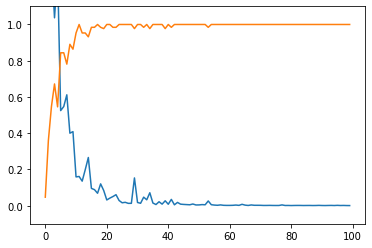

In [32]:
#training
model = models.resnet18(pretrained=True)
model.conv1=nn.Conv2d(1, model.conv1.out_channels, 
                      kernel_size=model.conv1.kernel_size[0], 
                      stride=model.conv1.stride[0], 
                      padding=model.conv1.padding[0])
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)
model.to(device)

loss_list, acc_list = [],[]
loss_func = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)
num_epochs = 20
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        outputs = model(images)
        label = torch.max(labels,1)[1]
        loss = loss_func(outputs,label)
        loss_list.append(loss.item())
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total = labels.size(0)
        
        _, predicted = torch.max(outputs.data,1)
        correct = (predicted == label).sum().item()
        acc_list.append(correct/total)
        
        print('Epoch [{}/{}], Step [{},{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                .format(epoch+1, num_epochs, i+1, total_step, loss.item(),
                       (correct/total)*100))
    
plt.ylim(-0.1,1.1)
plt.plot(loss_list)
plt.plot(acc_list)

In [46]:
model.eval()
waveform, sr = torchaudio.load('wavfiles/1f81cc2b.wav', normalize=True)
        
resample_transform = torchaudio.transforms.Resample(orig_freq=sr, new_freq=fixed_sample_rate)
audio_mono = torch.mean(resample_transform(waveform), dim=0, keepdim=True).to(device)

mel_spectogram_transform = torchaudio.transforms.MelSpectrogram(sample_rate=fixed_sample_rate, n_mels=128).to(device)
melspectogram_db_transform = torchaudio.transforms.AmplitudeToDB()
melspectogram = mel_spectogram_transform(audio_mono)
melspectogram_db = melspectogram_db_transform(melspectogram)

fixed_length = 3 * (fixed_sample_rate//200)
if melspectogram_db.shape[2] < fixed_length:
    melspectogram_db = torch.nn.functional.pad(
      melspectogram_db, (0, fixed_length - melspectogram_db.shape[2]))
else:
    melspectogram_db = melspectogram_db[:, :, :fixed_length]

melspectogram_db = melspectogram_db.unsqueeze(0)
    
with torch.no_grad():
    output = model(melspectogram_db)
print(torch.argmax(output))
print(classes[torch.argmax(output)])
output

tensor(3, device='cuda:0')
Clarinet


tensor([[-1.9859, -4.2511, -0.3389, 11.2296, -0.8819, -1.3526, -1.5834,  0.7750,
         -2.6883, -1.4610]], device='cuda:0')